In [24]:
##%tensorflow_version 2.x
import tensorflow as tf
import string
import requests

In [51]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [52]:
from keras import losses 
from keras import optimizers 
from keras import metrics 


In [26]:
import pandas as pd 
import numpy as np 
import re 
import sys
import matplotlib.pyplot as plt
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

# hide warnings
import warnings
warnings.filterwarnings('ignore')


# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
tokenizer = Tokenizer()

In [28]:

with open('C:/Users/JU486WK/OneDrive - EY/Desktop/Automatic Text Generation/Happy Birthday.txt', 'r') as fileinput:
    
    for line in fileinput:
        
        line = line.lower()

In [29]:
line

'happy birthday. many many happy returns of the day. enjoy your day. wishing a great year ahead. regards, ey hr team.congratulations for your promotion to a new role. continue your good work. many more accolades yet to come. be motivated'

In [30]:
corpus = line.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [31]:
corpus

['happy birthday. many many happy returns of the day. enjoy your day. wishing a great year ahead. regards, ey hr team.congratulations for your promotion to a new role. continue your good work. many more accolades yet to come. be motivated']

In [32]:
total_words

34

In [33]:
## Creating Input sequences ##
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [34]:
## padding sequences ##
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [35]:
## Extract the last word of sequence and convert it to categorical from numerical ##
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

## Bidirectional LSTM ##

In [36]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
#model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 100)           3400      
_________________________________________________________________
bidirectional (Bidirectional (None, 40, 300)           301200    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 34)                3434      
_________________________________________________________________
dense_1 (Dense)              (None, 34)                1190      
Total params: 469,624
Trainable params: 469,624
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
40/40 [==============================] - 5s 122ms/sample - loss: 4.0202 - acc: 0.0000e+00
Epoch 2/100
40/40 [==============================] - 1s 21ms/sample - loss: 4.0020 - acc: 0.0750
Epoch 3/100
40/40 [==============================] - 1s 19ms/sample - loss: 3.9838 - acc: 0.1000
Epoch 4/100
40/40 [==============================] - 1s 18ms/sample - loss: 3.9656 - acc: 0.1250
Epoch 5/100
40/40 [==============================] - 1s 19ms/sample - loss: 3.9455 - acc: 0.1250
Epoch 6/100
40/40 [==============================] - 1s 21ms/sample - loss: 3.9228 - acc: 0.1500
Epoch 7/100
40/40 [==============================] - 1s 19ms/sample - loss: 3.8953 - acc: 0.0750
Epoch 8/100
40/40 [==============================] - 1s 18ms/sample - loss: 3.8562 - acc: 0.0750
Epoch 9/100
40/40 [==============================] - 1s 19ms/sample - loss: 3.8178 - acc: 0.0750
Epoch 10/100
40/40 [==============================] - 1s 20ms/sample - los

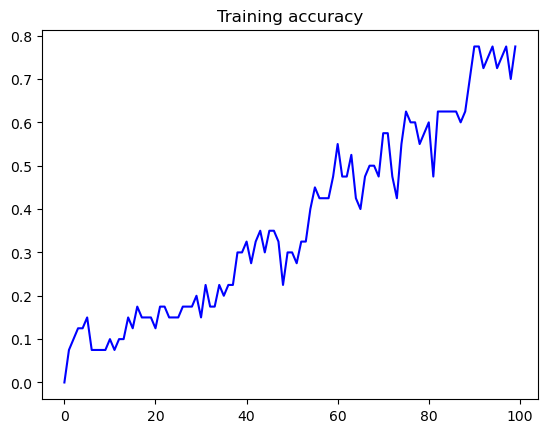

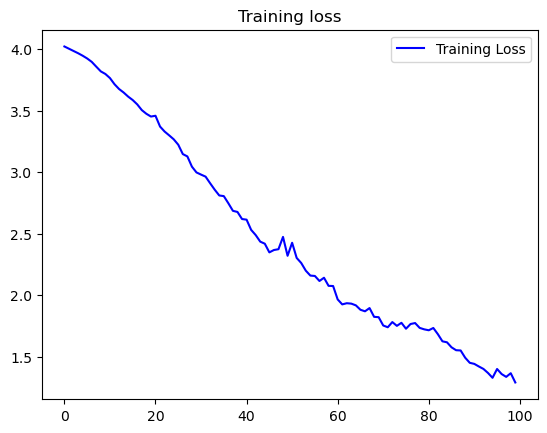

In [38]:
## Plot the accuracy and loss ##
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [39]:
seed_text = " Happy Birthday Nilanjan."
next_words = 10

In [40]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list),axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

 Happy Birthday Nilanjan. many many happy returns of the enjoy enjoy your your


In [211]:
seed_text = "Congratulations on your promotion."
next_words = 10

In [212]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list),axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Congratulations on your promotion. many happy happy day day day day day day a


## LSTM ##

In [ ]:
#model.add(Dense(total_words, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dense(total_words, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model.summary())

In [41]:
model = Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence_len-1))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(total_words,activation='relu'))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 100)           3400      
_________________________________________________________________
lstm_2 (LSTM)                (None, 40, 100)           80400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 34)                3434      
_________________________________________________________________
dense_3 (Dense)              (None, 34)                1190      
Total params: 168,824
Trainable params: 168,824
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
40/40 [==============================] - 3s 79ms/sample - loss: 3.5279 - acc: 0.0000e+00
Epoch 2/100
40/40 [==============================] - 0s 9ms/sample - loss: 3.5231 - acc: 0.0500
Epoch 3/100
40/40 [==============================] - 0s 9ms/sample - loss: 3.5199 - acc: 0.0750
Epoch 4/100
40/40 [==============================] - 0s 9ms/sample - loss: 3.5151 - acc: 0.1000
Epoch 5/100
40/40 [==============================] - 0s 9ms/sample - loss: 3.5101 - acc: 0.1250
Epoch 6/100
40/40 [==============================] - 0s 9ms/sample - loss: 3.5027 - acc: 0.1250
Epoch 7/100
40/40 [==============================] - 0s 10ms/sample - loss: 3.4918 - acc: 0.1500
Epoch 8/100
40/40 [==============================] - 0s 10ms/sample - loss: 3.4784 - acc: 0.1000
Epoch 9/100
40/40 [==============================] - 0s 9ms/sample - loss: 3.4527 - acc: 0.0750
Epoch 10/100
40/40 [==============================] - 0s 10ms/sample - loss: 3.4123 - acc: 0.0500
Epoch 11/100
40/40 [===========

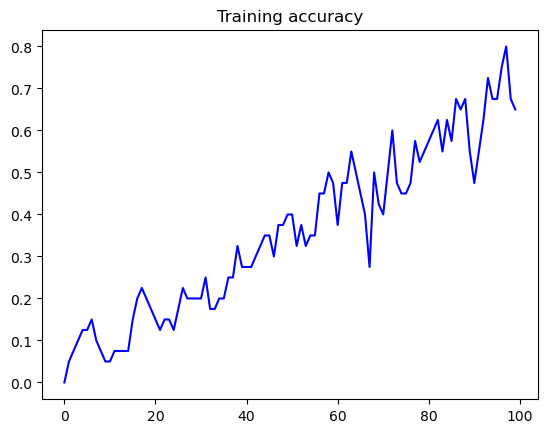

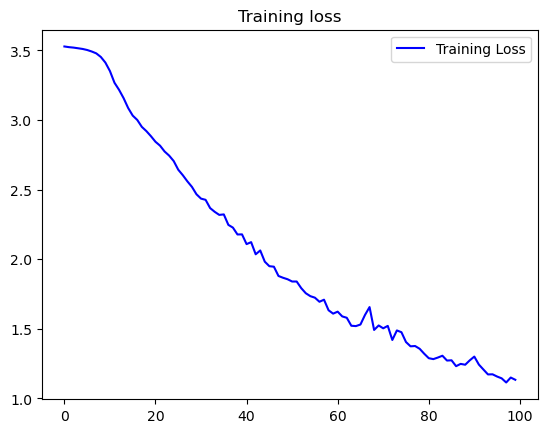

In [43]:
## Plot the accuracy and loss ##
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [44]:
seed_text = " Happy Birthday Nilanjan."
next_words = 10

In [45]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list),axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

 Happy Birthday Nilanjan. many many happy returns of the day day day day


## GRU ##

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100,
                             input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(total_words, activation='relu'),
    tf.keras.layers.Dense(total_words, activation='softmax'),
    ##model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 40, 100)           3400      
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               63360     
_________________________________________________________________
dense_10 (Dense)             (None, 34)                4386      
_________________________________________________________________
dense_11 (Dense)             (None, 34)                1190      
Total params: 72,336
Trainable params: 72,336
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
40/40 [==============================] - 3s 71ms/sample - loss: 3.5295 - acc: 0.0250
Epoch 2/100
40/40 [==============================] - 0s 5ms/sample - loss: 3.5190 - acc: 0.0750
Epoch 3/100
40/40 [==============================] - 0s 5ms/sample - loss: 3.5119 - acc: 0.1250
Epoch 4/100
40/40 [==============================] - 0s 5ms/sample - loss: 3.5068 - acc: 0.1000
Epoch 5/100
40/40 [==============================] - 0s 5ms/sample - loss: 3.5002 - acc: 0.1000
Epoch 6/100
40/40 [==============================] - 0s 5ms/sample - loss: 3.4942 - acc: 0.1000
Epoch 7/100
40/40 [==============================] - 0s 5ms/sample - loss: 3.4865 - acc: 0.1000
Epoch 8/100
40/40 [==============================] - 0s 5ms/sample - loss: 3.4780 - acc: 0.0750
Epoch 9/100
40/40 [==============================] - 0s 4ms/sample - loss: 3.4691 - acc: 0.0750
Epoch 10/100
40/40 [==============================] - 0s 5ms/sample - loss: 3.4595 - acc: 0.1250
Epoch 11/100
40/40 [==================

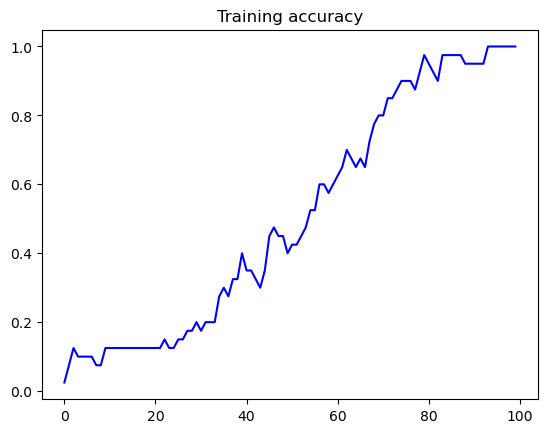

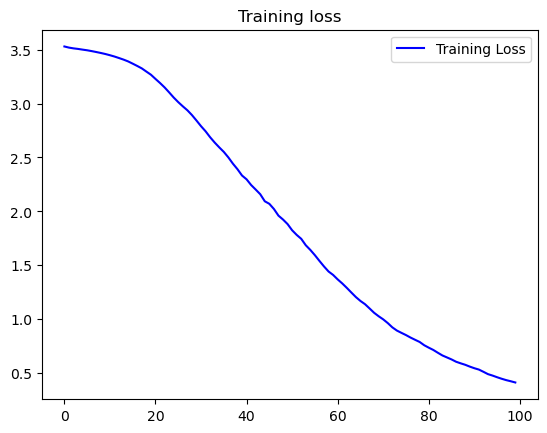

In [64]:
## Plot the accuracy and loss ##
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [65]:
zseed_text = " Happy Birthday Nilanjan."
next_words = 10

In [66]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list),axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

 Happy Birthday Nilanjan. many many happy returns of the day enjoy your day


In [59]:
seed_text = "Congratulations for your promotion"
next_words = 10

In [60]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list),axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Congratulations for your promotion to a new role continue your good work many many


## LSTM_NEW ##

In [213]:
line

'happy birthday. many many happy returns of the day. enjoy your day. wishing a great year ahead. regards, ey hr team.congratulations for your promotion to a new role. continue your good work. many more accolades yet to come. be motivated'

In [214]:
line = line.split('\n')

In [215]:
line

['happy birthday. many many happy returns of the day. enjoy your day. wishing a great year ahead. regards, ey hr team.congratulations for your promotion to a new role. continue your good work. many more accolades yet to come. be motivated']

In [216]:
line = " ".join(line)

In [217]:
line

'happy birthday. many many happy returns of the day. enjoy your day. wishing a great year ahead. regards, ey hr team.congratulations for your promotion to a new role. continue your good work. many more accolades yet to come. be motivated'

In [218]:
## Preprocessing the text ##
def clean_text(doc):
    tokens = doc.split()
    table = str.maketrans('', '',string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]
    return tokens
    
 

In [219]:
tokens = clean_text(line)

In [220]:
tokens

['happy',
 'birthday',
 'many',
 'many',
 'happy',
 'returns',
 'of',
 'the',
 'day',
 'enjoy',
 'your',
 'day',
 'wishing',
 'a',
 'great',
 'year',
 'ahead',
 'regards',
 'ey',
 'hr',
 'teamcongratulations',
 'for',
 'your',
 'promotion',
 'to',
 'a',
 'new',
 'role',
 'continue',
 'your',
 'good',
 'work',
 'many',
 'more',
 'accolades',
 'yet',
 'to',
 'come',
 'be',
 'motivated']

In [221]:
print(tokens[:10])

['happy', 'birthday', 'many', 'many', 'happy', 'returns', 'of', 'the', 'day', 'enjoy']


In [222]:
len(set(tokens))

32

In [233]:
length = 20 + 1
lines = []

for i in range(length, len(tokens)):
    seq = tokens[i-length:i]
    line = ' '.join(seq)
    lines.append(line)
    if i > 40:
        break
print(len(lines))         
  

19


In [234]:
## Build LSTM model and Prepare X and y ##

In [235]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM , Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [236]:
tokenizer = Tokenizer()

In [237]:
tokenizer.fit_on_texts(lines)

In [238]:
sequences = tokenizer.texts_to_sequences(lines)

In [239]:
sequences = np.array(sequences)

In [240]:
vocab_size = len(tokenizer.word_index) + 1

In [241]:
X,y = sequences[:,:-1],sequences[:,-1]

In [242]:
y = to_categorical(y,num_classes=vocab_size)

In [243]:
seq_length = X.shape[1]
seed_text = "Happy Birthday."

## LSTM Model ##

In [244]:
model = Sequential()
model.add(Embedding(vocab_size,50,input_length=seq_length))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100,activation='relu'))
model.add(Dense(vocab_size,activation='softmax'))

In [245]:
model.compile(loss = 'categorical_crossentropy',optimizer= 'adam', metrics = ['accuracy'])
model.fit(X,y,batch_size = 256,epochs=100)

Epoch 1/100
19/19 [==============================] - 3s 183ms/sample - loss: 3.4660 - acc: 0.0526
Epoch 2/100
19/19 [==============================] - 0s 10ms/sample - loss: 3.4626 - acc: 0.1053
Epoch 3/100
19/19 [==============================] - 0s 10ms/sample - loss: 3.4588 - acc: 0.1053
Epoch 4/100
19/19 [==============================] - 0s 9ms/sample - loss: 3.4544 - acc: 0.1053
Epoch 5/100
19/19 [==============================] - 0s 9ms/sample - loss: 3.4490 - acc: 0.1053
Epoch 6/100
19/19 [==============================] - 0s 9ms/sample - loss: 3.4423 - acc: 0.1053
Epoch 7/100
19/19 [==============================] - 0s 9ms/sample - loss: 3.4338 - acc: 0.1053
Epoch 8/100
19/19 [==============================] - 0s 9ms/sample - loss: 3.4225 - acc: 0.1053
Epoch 9/100
19/19 [==============================] - 0s 9ms/sample - loss: 3.4075 - acc: 0.1053
Epoch 10/100
19/19 [==============================] - 0s 9ms/sample - loss: 3.3869 - acc: 0.1053
Epoch 11/100
19/19 [===============

In [246]:
lines[18]

'ey hr teamcongratulations for your promotion to a new role continue your good work many more accolades yet to come be'

In [247]:
def generate_text_seq(model,tokenizer,text_seq_length,seed_text,n_words):
    text = []
    for _ in range(n_words):
        encoded = tokenizer.texts_to_sequences([seed_text])[0]
        encoded = pad_sequences([encoded], maxlen = text_seq_length,truncating='pre')
        y_predic = model.predict_classes(encoded)
        predicted_word = ''
        for word , index in tokenizer.word_index.items():
            if index == y_predic:
                predicted_word = word
                break
        seed_text = seed_text + ' ' + predicted_word
        text.append(predicted_word)
    return ' '.join(text) 

In [248]:
generate_text_seq(model,tokenizer,seq_length,seed_text,10)

'come come come come be be be be be be'

In [249]:
seed_text

'Happy Birthday.'